In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 5.1 데이터 import DB화 / CSV파일
# 데이터를 보고서 우리는 회귀문제를 풀어야한다.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

In [ ]:
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  PRICE  
0        -122

In [ ]:
# 5.2 데이터 확인
print(df.head())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

In [ ]:
# 5.3 데이터 전처리
# 어떻게 하면 더 예측을 잘할까? -> 다양한 처리!

# X에는 y에 해당하는 label이 들어있으면 안된다.
# 왜냐하면 X에 y가 들어가면 정답을 주고 예측하라는 것과 동일!
X = df.drop('PRICE', axis=1) # 정답이 없는 상태
y = df['PRICE'] # 정답

In [ ]:
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
# 표준화 (평균 0, 분산 1로 조정)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(X_scaled)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [ ]:
# 5.4 데이터 분할
# 데이터 분할 학습할 데이터와 테스트할 데이터를 나누는 작업
# 8또는 7인 부분을 가지고 패턴을 만들고, 2~3인 부분을가지고 잘 만들어졌는지 테스트! 자체검증

# test_size 테스트 데이터의 비율 -> 전체 데이터 중에 20%만 가져올거다.
# random_state를 정하지 않으면 데이터가 자꾸 섞이거나 바뀜 고정값을 정함
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train, y_train)

[[-0.32165429  0.34647803 -0.16625886 ...  0.05980847 -1.36797628
   1.26764451]
 [-0.03061993  1.61780729 -0.3861807  ... -0.12830597 -0.87169852
   0.7036268 ]
 [ 0.1503488  -1.95780625  0.08764093 ... -0.03345346 -0.45501247
  -0.45435647]
 ...
 [-0.49283239  0.58485227 -0.58294927 ...  0.02517025 -0.74997001
   0.59381804]
 [ 0.97302487 -1.08376738  0.39058403 ...  0.01042151  0.91209231
  -1.19306993]
 [-0.68174943  1.85618152 -0.81905034 ... -0.09262259  1.00104776
  -1.42267006]] 14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: PRICE, Length: 16512, dtype: float64


In [ ]:
# 5.4까지해서 데이터가 준비!

# 5.5부터 모델에 대한 준비!

# 5.5 알고리즘 선택 - 베이스라인 모델! 가장 기본적인 모델!
model = LinearRegression()

In [ ]:
# 5.6 학습
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 5.7 예측
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [ ]:
# 5.8 평가
# 실제 데이터와 예측된 데이터를 비교해서 얼마나 차이가 있는지를 파악!
# mse = 얼마나 오류가 많은지? r2는 얼마나 모델이 설명력이 좋은지
# mse는 낮아야하고, r2는 높을수록 좋은 모델!
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#r2는 1에 가까울수록 좋음

In [ ]:
print(mse, r2)

0.555891598695244 0.5757877060324511


In [ ]:
# 5.9 튜닝 (간단한 예시)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100,],
    'max_depth': [None, 5],
    'min_samples_split': [2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 최적의 모델로 예측 및 평가
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best model - Mean squared error: {mse_best:.2f}")
print(f"Best model - R-squared score: {r2_best:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8042504685346069
Best model - Mean squared error: 0.26
Best model - R-squared score: 0.81


In [ ]:
# 머신러닝 모델이 예측률이 좋다!

# 1. 기존에 진행한 분석보다 좋으면 보통 좋다고 판단
# 기존에 80% 예측률 -> 81%

# 2. 예측률은 크게 변하지 않았는데, 새로운 변수를 발견! 좋다고 판단 -> 비즈니스적인 부분
# 예측률은 80% / 80%
# 기존에는 집값 - 지하철역과 가까움 / 화장실이 3개 이상
# 최근에 모델 -> 주변에 일자리가 많았을때 / 고속도로가 많을때

# 3. 기준이 없을때에는 보통 80% 이상정도는 되어야 현업에서 사용할수 있는 정도
# 정확도 99% / 1%는 틀릴수 있다. 굉장히 리스크할수 있어요.
# 백만명 서비스 -> 만명!

In [30]:
# 1. 데이터 로딩 방법
# tensorflow -> 내일 딥러닝 / sklearn으로도 구현!
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# x_train - 훈련을 위한 데이터 / y_train 0~9까지 정답이 들어있는 데이터
# x_test - 평가를 위한 데이터 / y_test 0~9까지 정답이 들어있는 데이터

In [37]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# 일반적으로 대상을 x 예측값은 y

In [39]:
print(f"정규화된 훈련 데이터: {x_train[0]}")

정규화된 훈련 데이터: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.  

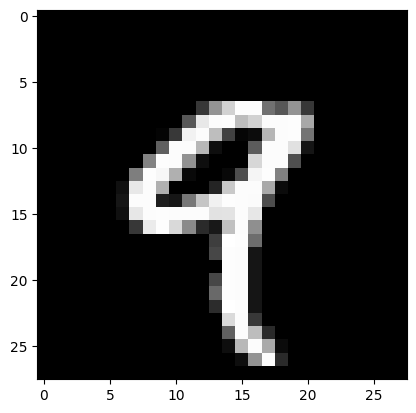

9


In [38]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4], cmap='gray')
plt.show()

print(y_train[4])

In [40]:
# 2.3 데이터 전처리

from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 - 데이터에 대한 집합명령!
scaler = StandardScaler()
# 2차원으로 되어있는 것을 1차원으로 줄을 세우는 28*28 -> 736 일렬로 나열한 다음에 -> 평균이 0이고 표준편차가 1이 될수 있도록 변환!
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 28*28))
x_test_scaled = scaler.transform(x_test.reshape(-1, 28*28))

print(f"스케일링된 훈련 데이터: {x_train_scaled[0]}")


스케일링된 훈련 데이터: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
 -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
 -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
 -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
 -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
 -8.5224123

In [41]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 검증 데이터로 분할
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"훈련 데이터 크기: {x_train.shape}")
print(f"검증 데이터 크기: {x_val.shape}")
print(f"테스트 데이터 크기: {x_test.shape}")


훈련 데이터 크기: (48000, 28, 28)
검증 데이터 크기: (12000, 28, 28)
테스트 데이터 크기: (10000, 28, 28)


In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression(max_iter=200)

# 모델 훈련
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\\n{report}")


Accuracy: 1.0
Classification Report:\n              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 머신러닝 실습!

In [88]:
# 필요 라이브러리 구현
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [89]:
# 데이터 import
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [90]:
# 문자형의 형태를 숫자형으로 변환 딥러닝이나 연산시에 숫자형으로 구현하는것이 예측에 도움
# mnist.target

# 숫자형보다는 문자형으로 데이터를 적재 -> 메모리 차원에서 좀더 효율적!

In [91]:
# 데이터 전처리
# X는 정규화 255로 나누어가지고 0과 1사이의 값으로
# y는 0~9까지의 값인데, 숫자형태로 변환!
X,y = mnist.data / 255.0, mnist.target.astype(int)

In [92]:
print(X,y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [5 0 4 ... 4 5 6]


In [93]:
# 0과 1만 선택! 파이썬 filtering
# 이진 분류(binary) 0과 1만 예측하도록 수행!
X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

In [94]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size = 0.2, random_state = 300)

In [95]:
print(len(X_train))
print(len(X_test))

11824
2956


In [96]:
X_train.shape

(11824, 784)

In [97]:
X_test.shape

(2956, 784)

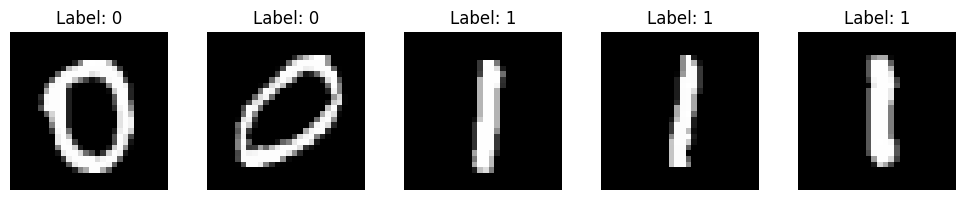

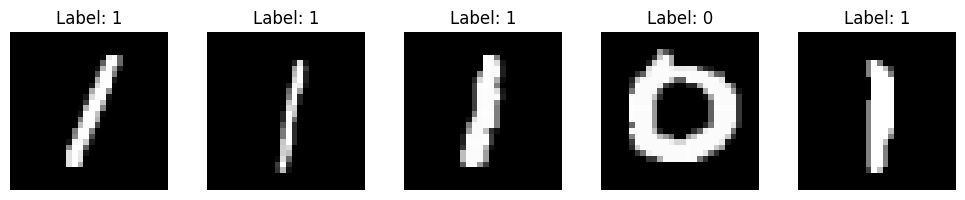

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mnist_images(X, y, num_images=5):
    # 서브플롯 생성: 1행, num_images열의 그리드 생성
    # figsize로 전체 figure의 크기 설정 (가로 길이는 이미지 개수에 비례)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images*2, 2))

    for i in range(num_images):
        ax = axes[i]
        # 1차원 배열을 28x28 2차원 배열로 재구성
        image = X[i].reshape(28, 28)
        # 흑백 이미지로 표시 (cmap='gray')
        ax.imshow(image, cmap='gray')
        # 각 이미지 위에 레이블 표시
        ax.set_title(f"Label: {y[i]}")
        # 축 눈금 제거"
        ax.axis('off')

    # 서브플롯 간 간격 조정
    plt.tight_layout()
    # 그래프 표시
    plt.show()

# X_train의 처음 5개 이미지 시각화
plot_mnist_images(X_train, y_train)

def plot_random_mnist_images(X, y, num_images=5):
    # 0부터 X의 길이 사이에서 랜덤하게 num_images개의 인덱스 선택
    indices = np.random.randint(0, X.shape[0], num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(num_images*2, 2))
    for i, idx in enumerate(indices):
        ax = axes[i]
        # 선택된 인덱스의 이미지를 28x28 크기로 재구성
        image = X[idx].reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {y[idx]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# X_train에서 랜덤하게 5개 이미지 선택하여 시각화
plot_random_mnist_images(X_train, y_train)

In [99]:
import numpy as np

def print_mnist_pixel_values(X, index=0):
    # 1D 배열을 28x28 2D 배열로 재구성
    image = X[index].reshape(28, 28)

    print(f"MNIST 이미지 {index}의 픽셀 값:")
    print("[", end="")
    for i, row in enumerate(image):
        if i == 0:
            print("[", end="")
        else:
            print(" [", end="")

        for j, pixel in enumerate(row):
            # 픽셀 값을 정수로 변환하고 3자리로 포맷팅
            print(f"{int(pixel*255):3d}", end="")
            if j < 27:
                print(", ", end="")

        if i == 27:
            print("]]")
        else:
            print("],")
    print()

# X_train의 첫 번째 이미지 픽셀 값 출력
print_mnist_pixel_values(X_train)

# 다른 이미지의 픽셀 값을 보려면 index 매개변수를 변경하세요
# 예: 10번째 이미지의 픽셀 값 출력
print_mnist_pixel_values(X_train, index=8)

MNIST 이미지 0의 픽셀 값:
[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 136, 254, 255, 254, 255, 199,  62,   0,   0,   0,   0,   0,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 185, 234, 253, 253, 253, 253, 253, 253, 236,  58,   0,   0,   0,   0,  

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [101]:
# 모델에 생성!
from sklearn.linear_model import LogisticRegression

# 고정값, 최대 반복 수행 - 100번까지 반복 ()안에 있는것은 옵션! -> 다른 모델을 사용해서 모델을 변경!
model = LogisticRegression(random_state = 300, max_iter=100)

# 모델 구축! x와 y를 적절한 위치에 배치!
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=300)

In [102]:
# 모델 평가!
from sklearn.metrics import accuracy_score, classification_report

In [103]:
# 테스트 데이터에 대한 예측 수행!
y_pred = model.predict(X_test_scaled)
# 위 부분을 수행하면 확률값(예측값) 산출이 되고, y_pred에는 최종 예측값이 나오게 됩니다.

In [104]:
y_pred_proba = model.predict_proba(X_test_scaled)

In [105]:
# 로지스틱회귀모델이 예측값0.5를 기준으로 0.5보다 크면 1 0.5보다 작으면 0을 바라보고 예측
print(y_pred)

[0 0 1 ... 1 0 0]


In [106]:
print(y_pred_proba)

[[9.99999918e-01 8.18711352e-08]
 [9.99994006e-01 5.99436547e-06]
 [5.95942868e-07 9.99999404e-01]
 ...
 [2.40440470e-06 9.99997596e-01]
 [9.99996957e-01 3.04263023e-06]
 [9.99998670e-01 1.33047627e-06]]


In [107]:
accuracy = accuracy_score(y_test, y_pred) # 실제데이터(y_test)와 예측데이터(y_pred)를 일치여부 확인
report = classification_report(y_test, y_pred) # 다양한 통계값을 확인

In [108]:
print(accuracy)

0.9996617050067659


In [109]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



In [112]:
# 모델 비교
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# SVM모델 생성 및 훈련
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 랜덤포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [114]:
print(y_pred_svm)

[0 0 1 ... 1 0 0]


In [115]:
print(y_pred_rf)

[0 0 1 ... 1 0 0]


In [116]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_rf  = accuracy_score(y_test,y_pred_rf)
report_svm = classification_report(y_test,y_pred_svm)
report_rf = classification_report(y_test,y_pred_rf)

In [117]:
print(accuracy_svm)
print(report_svm)

0.9993234100135318
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



In [118]:
print(accuracy_rf)
print(report_rf)

0.9993234100135318
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



In [119]:
# 모델 성능 비교
models = {
    "Logistic Regression": (model, accuracy, report),
    "SVM": (svm_model, accuracy_svm, report_svm),
    "Random Forest": (rf_model, accuracy_rf, report_rf)
}

best_model_name = None
best_model_accuracy = 0

for model_name, (model_instance, model_accuracy, model_report) in models.items():
    print(f"모델: {model_name}")
    print(f"정확도: {model_accuracy:.4f}")
    print("분류 보고서:")
    print(model_report)
    print("\n")

    if model_accuracy > best_model_accuracy:
        best_model_accuracy = model_accuracy
        best_model_name = model_name

print(f"최적의 모델은 {best_model_name} 입니다. 정확도: {best_model_accuracy:.4f}")



모델: Logistic Regression
정확도: 0.9997
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



모델: SVM
정확도: 0.9993
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



모델: Random Forest
정확도: 0.9993
분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1447
           1       1.00      1.00      1.00      1509

    accuracy                           1.00      2956
   macro avg  

In [121]:
import joblib

In [122]:
# 모델과 스케일러 저장
joblib.dump(model, 'sklearn_logistic_model.joblib')
joblib.dump(scaler, 'sklearn_scaler.joblib')
print("모델과 스케일러가 저장되었습니다.")

모델과 스케일러가 저장되었습니다.
